# MNIST Dataset Loading and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

# Path to MNIST dataset
MNIST_PATH = "./dataset/MNIST"

In [2]:
def load_mnist_images(filename):
    """
    Load MNIST images from IDX format file.
    Returns images as numpy array of shape (num_images, 28, 28)
    """
    with open(filename, 'rb') as f:
        # Read magic number and dimensions
        magic = struct.unpack('>I', f.read(4))[0]
        num_images = struct.unpack('>I', f.read(4))[0]
        num_rows = struct.unpack('>I', f.read(4))[0]
        num_cols = struct.unpack('>I', f.read(4))[0]
        
        # Read image data
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return images

def load_mnist_labels(filename):
    """
    Load MNIST labels from IDX format file.
    Returns labels as numpy array of shape (num_labels,)
    """
    with open(filename, 'rb') as f:
        # Read magic number and number of labels
        magic = struct.unpack('>I', f.read(4))[0]
        num_labels = struct.unpack('>I', f.read(4))[0]
        
        # Read label data
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

In [3]:
# Load all MNIST data
print("Loading MNIST dataset...")

# Training data
train_images = load_mnist_images(os.path.join(MNIST_PATH, "train-images.idx3-ubyte"))
train_labels = load_mnist_labels(os.path.join(MNIST_PATH, "train-labels.idx1-ubyte"))

# Test data
test_images = load_mnist_images(os.path.join(MNIST_PATH, "t10k-images.idx3-ubyte"))
test_labels = load_mnist_labels(os.path.join(MNIST_PATH, "t10k-labels.idx1-ubyte"))

print(f"✓ Training data loaded: {train_images.shape} images, {train_labels.shape} labels")
print(f"✓ Test data loaded: {test_images.shape} images, {test_labels.shape} labels")

Loading MNIST dataset...
✓ Training data loaded: (60000, 28, 28) images, (60000,) labels
✓ Test data loaded: (10000, 28, 28) images, (10000,) labels


## Visualizing Sample Images

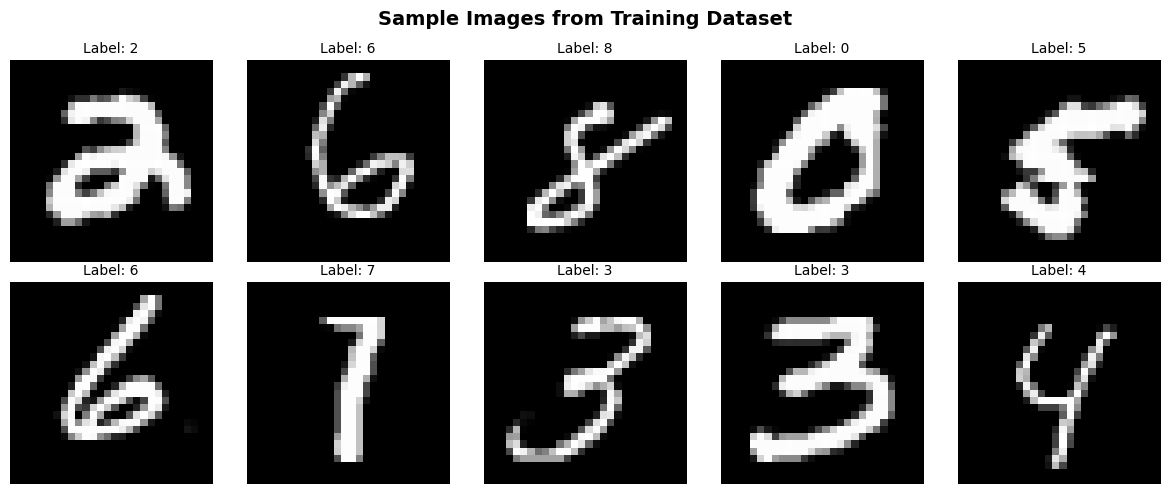

In [4]:
# Display 10 random training images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Images from Training Dataset", fontsize=14, fontweight='bold')

# Get 10 random indices
random_indices = np.random.choice(len(train_images), 10, replace=False)

for idx, ax in enumerate(axes.flat):
    img_idx = random_indices[idx]
    ax.imshow(train_images[img_idx], cmap='gray')
    ax.set_title(f"Label: {train_labels[img_idx]}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Display statistics about the dataset
print("=" * 50)
print("MNIST DATASET STATISTICS")
print("=" * 50)

print(f"\nTraining Data:")
print(f"  - Images shape: {train_images.shape}")
print(f"  - Labels shape: {train_labels.shape}")
print(f"  - Image range: [{train_images.min()}, {train_images.max()}]")
print(f"  - Unique classes: {np.unique(train_labels)}")
print(f"  - Class distribution:")
for digit in range(10):
    count = np.sum(train_labels == digit)
    percentage = 100 * count / len(train_labels)
    print(f"    Digit {digit}: {count:6d} images ({percentage:5.1f}%)")

print(f"\nTest Data:")
print(f"  - Images shape: {test_images.shape}")
print(f"  - Labels shape: {test_labels.shape}")
print(f"  - Image range: [{test_images.min()}, {test_images.max()}]")
print(f"  - Class distribution:")
for digit in range(10):
    count = np.sum(test_labels == digit)
    percentage = 100 * count / len(test_labels)
    print(f"    Digit {digit}: {count:6d} images ({percentage:5.1f}%)")

MNIST DATASET STATISTICS

Training Data:
  - Images shape: (60000, 28, 28)
  - Labels shape: (60000,)
  - Image range: [0, 255]
  - Unique classes: [0 1 2 3 4 5 6 7 8 9]
  - Class distribution:
    Digit 0:   5923 images (  9.9%)
    Digit 1:   6742 images ( 11.2%)
    Digit 2:   5958 images (  9.9%)
    Digit 3:   6131 images ( 10.2%)
    Digit 4:   5842 images (  9.7%)
    Digit 5:   5421 images (  9.0%)
    Digit 6:   5918 images (  9.9%)
    Digit 7:   6265 images ( 10.4%)
    Digit 8:   5851 images (  9.8%)
    Digit 9:   5949 images (  9.9%)

Test Data:
  - Images shape: (10000, 28, 28)
  - Labels shape: (10000,)
  - Image range: [0, 255]
  - Class distribution:
    Digit 0:    980 images (  9.8%)
    Digit 1:   1135 images ( 11.3%)
    Digit 2:   1032 images ( 10.3%)
    Digit 3:   1010 images ( 10.1%)
    Digit 4:    982 images (  9.8%)
    Digit 5:    892 images (  8.9%)
    Digit 6:    958 images (  9.6%)
    Digit 7:   1028 images ( 10.3%)
    Digit 8:    974 images (  9.7%)

## Training MLP with scikit-learn

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Prepare data: flatten images for MLP
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels
y_test = test_labels

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Data prepared for MLP:")
print(f"  - Training data shape: {X_train.shape}")
print(f"  - Test data shape: {X_test.shape}")

Data prepared for MLP:
  - Training data shape: (60000, 784)
  - Test data shape: (10000, 784)


In [ ]:
# Define and configure MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    max_iter=300,
    batch_size=128,
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=0
)

print("\nMLP Configuration:")
print(f"  - Architecture: 784 -> 256 -> 128 -> 10")
print(f"  - Hidden layers: {mlp.hidden_layer_sizes}")
print(f"  - Activation: {mlp.activation}")
print(f"  - Max iterations: {mlp.max_iter}")
print(f"  - Learning rate: {mlp.learning_rate_init}")
print(f"  - Early stopping: {mlp.early_stopping}")


MLP Configuration:
  - Hidden layers: (256, 128)
  - Activation: relu
  - Max iterations: 300
  - Learning rate: 0.001
  - Early stopping: True


In [9]:
# Train model on training data
print("\n" + "="*70)
print("TRAINING MLP ON TRAINING DATA")
print("="*70 + "\n")

print("Training model...")
start_time = time.time()
mlp.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds\n")

# Evaluate on both train and test sets
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

print("TRAINING SET METRICS:")
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='macro', zero_division=0)
train_recall = recall_score(y_train, y_pred_train, average='macro', zero_division=0)
train_f1 = f1_score(y_train, y_pred_train, average='macro', zero_division=0)

print(f"  - Accuracy:        {train_accuracy:.4f}")
print(f"  - Precision (macro): {train_precision:.4f}")
print(f"  - Recall (macro):    {train_recall:.4f}")
print(f"  - F1-Score (macro):  {train_f1:.4f}")

print("\nTEST SET METRICS:")
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_pred_test, average='macro', zero_division=0)
test_f1 = f1_score(y_test, y_pred_test, average='macro', zero_division=0)

print(f"  - Accuracy:        {test_accuracy:.4f}")
print(f"  - Precision (macro): {test_precision:.4f}")
print(f"  - Recall (macro):    {test_recall:.4f}")
print(f"  - F1-Score (macro):  {test_f1:.4f}")


TRAINING MLP ON TRAINING DATA

Training model...
Training completed in 170.99 seconds

TRAINING SET METRICS:
  - Accuracy:        0.9979
  - Precision (macro): 0.9979
  - Recall (macro):    0.9979
  - F1-Score (macro):  0.9979

TEST SET METRICS:
  - Accuracy:        0.9823
  - Precision (macro): 0.9823
  - Recall (macro):    0.9821
  - F1-Score (macro):  0.9822


In [10]:
# Detailed classification report on test set
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT (TEST SET)")
print("="*70 + "\n")
print(classification_report(y_test, y_pred_test, target_names=[str(i) for i in range(10)]))


DETAILED CLASSIFICATION REPORT (TEST SET)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



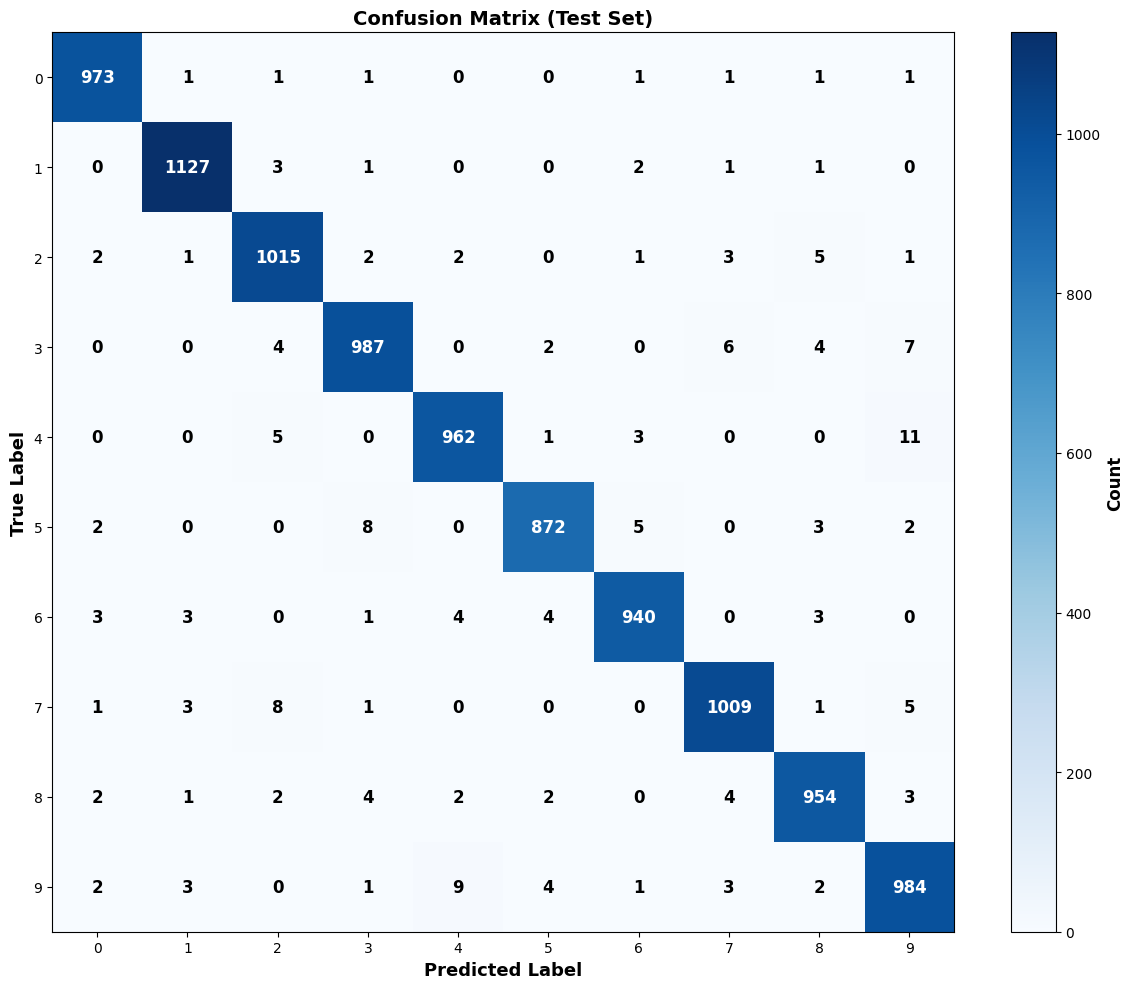

In [14]:
# Visualization of results - Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 10))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Display confusion matrix with annotations
im = ax.imshow(cm, cmap='Blues', aspect='auto')
ax.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

# Add text annotations showing the counts
for i in range(10):
    for j in range(10):
        count = cm[i, j]
        text_color = 'white' if count > cm.max() / 2 else 'black'
        ax.text(j, i, str(count), ha='center', va='center', color=text_color, fontsize=12, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Count', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Training Autoencoder with scikit-learn

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define and configure Autoencoder model
# Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784
autoencoder = MLPRegressor(
    hidden_layer_sizes=(256, 128, 10, 128, 256),
    activation='relu',
    max_iter=300,
    batch_size=128,
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=0
)

print("\nAutoencoder Configuration:")
print(f"  - Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784")
print(f"  - Hidden layers: {autoencoder.hidden_layer_sizes}")
print(f"  - Activation: {autoencoder.activation}")
print(f"  - Max iterations: {autoencoder.max_iter}")
print(f"  - Learning rate: {autoencoder.learning_rate_init}")
print(f"  - Early stopping: {autoencoder.early_stopping}")


Autoencoder Configuration:
  - Architecture: 784 -> 256 -> 128 -> 10 -> 128 -> 256 -> 784
  - Hidden layers: (256, 128, 10, 128, 256)
  - Activation: relu
  - Max iterations: 300
  - Learning rate: 0.001
  - Early stopping: True


In [18]:
# Train autoencoder on training data
print("\n" + "="*70)
print("TRAINING AUTOENCODER ON TRAINING DATA")
print("="*70 + "\n")

print("Training autoencoder...")
start_time = time.time()
autoencoder.fit(X_train, X_train)  # Input = Output (reconstruct input)
train_time = time.time() - start_time
print(f"Training completed in {train_time:.2f} seconds\n")

# Evaluate on both train and test sets
X_pred_train = autoencoder.predict(X_train)
X_pred_test = autoencoder.predict(X_test)

print("TRAINING SET METRICS:")
train_mse = mean_squared_error(X_train, X_pred_train)
train_mae = mean_absolute_error(X_train, X_pred_train)
train_rmse = np.sqrt(train_mse)

print(f"  - MSE (Mean Squared Error):   {train_mse:.6f}")
print(f"  - RMSE (Root Mean Squared Error): {train_rmse:.6f}")
print(f"  - MAE (Mean Absolute Error):  {train_mae:.6f}")

print("\nTEST SET METRICS:")
test_mse = mean_squared_error(X_test, X_pred_test)
test_mae = mean_absolute_error(X_test, X_pred_test)
test_rmse = np.sqrt(test_mse)

print(f"  - MSE (Mean Squared Error):   {test_mse:.6f}")
print(f"  - RMSE (Root Mean Squared Error): {test_rmse:.6f}")
print(f"  - MAE (Mean Absolute Error):  {test_mae:.6f}")


TRAINING AUTOENCODER ON TRAINING DATA

Training autoencoder...
Training completed in 163.44 seconds

TRAINING SET METRICS:
  - MSE (Mean Squared Error):   0.023146
  - RMSE (Root Mean Squared Error): 0.152137
  - MAE (Mean Absolute Error):  0.074634

TEST SET METRICS:
  - MSE (Mean Squared Error):   0.023590
  - RMSE (Root Mean Squared Error): 0.153589
  - MAE (Mean Absolute Error):  0.075133


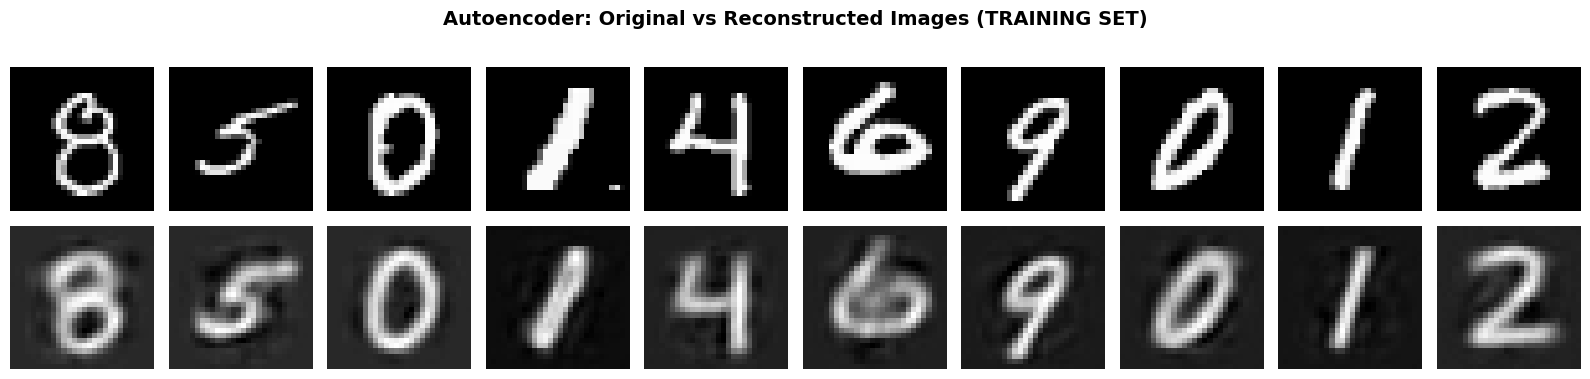


Autoencoder Reconstruction Examples (TRAINING SET):
  - Displayed 10 random examples


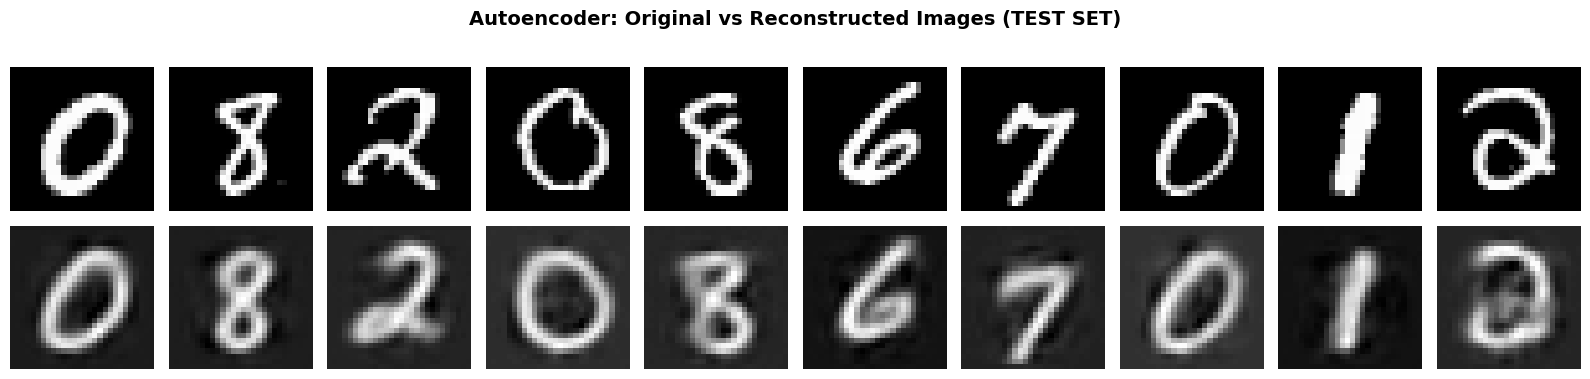


Autoencoder Reconstruction Examples (TEST SET):
  - Displayed 10 random examples


In [20]:
# Visualization of autoencoder reconstructions
# Display original vs reconstructed images from TRAINING set

fig1, axes1 = plt.subplots(2, 10, figsize=(16, 4))
fig1.suptitle('Autoencoder: Original vs Reconstructed Images (TRAINING SET)', 
             fontsize=14, fontweight='bold')

# Select 10 random images from training set
train_indices = np.random.choice(len(X_train), 10, replace=False)

# Original images
for idx, img_idx in enumerate(train_indices):
    original_img = X_train[img_idx].reshape(28, 28)
    axes1[0, idx].imshow(original_img, cmap='gray')
    axes1[0, idx].axis('off')
    if idx == 0:
        axes1[0, idx].set_ylabel('Original', fontsize=11, fontweight='bold')

# Reconstructed images
for idx, img_idx in enumerate(train_indices):
    reconstructed_img = X_pred_train[img_idx].reshape(28, 28)
    axes1[1, idx].imshow(reconstructed_img, cmap='gray')
    axes1[1, idx].axis('off')
    if idx == 0:
        axes1[1, idx].set_ylabel('Reconstructed', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAutoencoder Reconstruction Examples (TRAINING SET):")
print(f"  - Displayed {len(train_indices)} random examples")

# Visualization of autoencoder reconstructions
# Display original vs reconstructed images from TEST set

fig2, axes2 = plt.subplots(2, 10, figsize=(16, 4))
fig2.suptitle('Autoencoder: Original vs Reconstructed Images (TEST SET)', 
             fontsize=14, fontweight='bold')

# Select 10 random images from test set
test_indices = np.random.choice(len(X_test), 10, replace=False)

# Original images
for idx, img_idx in enumerate(test_indices):
    original_img = X_test[img_idx].reshape(28, 28)
    axes2[0, idx].imshow(original_img, cmap='gray')
    axes2[0, idx].axis('off')
    if idx == 0:
        axes2[0, idx].set_ylabel('Original', fontsize=11, fontweight='bold')

# Reconstructed images
for idx, img_idx in enumerate(test_indices):
    reconstructed_img = X_pred_test[img_idx].reshape(28, 28)
    axes2[1, idx].imshow(reconstructed_img, cmap='gray')
    axes2[1, idx].axis('off')
    if idx == 0:
        axes2[1, idx].set_ylabel('Reconstructed', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nAutoencoder Reconstruction Examples (TEST SET):")
print(f"  - Displayed {len(test_indices)} random examples")